### Quick Overview

Used Melissa ZipData to get median household income correlation to zipcode.  
Plotted Income and other things onto a map to visualize.  

In [2]:
# imports

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# load in data

zip_dat = pd.read_csv('ZipData.csv')

## EDA

In [4]:
zip_dat.head()

,RecordID,ZipCode,City,County,State,Latitude,Longitude,DominantAreaCode,ResidentialDeliveries,ResidentialPOBoxes,...,MedianHomeValue,MedianAge,MedianAgeMale,MedianAgeFemale,EducationNinthGradeOrLess,EducationSomeHighSchool,EducationHighSchoolGraduate,EducationSomeCollegeWithoutDiploma,EducationAssociatesDegree,EducationBachelorsDegree
0,1,90001,FIRESTONE PARK,LOS ANGELES,CA,33.9740,-118.2494,323,13443,304,...,617000.0,30.7,30.9,30.5,10877,7461,10348,7489,1759,2070
1,2,90001,LOS ANGELES,LOS ANGELES,CA,33.9740,-118.2494,323,13443,304,...,617000.0,30.7,30.9,30.5,10877,7461,10348,7489,1759,2070
2,3,90002,LOS ANGELES,LOS ANGELES,CA,33.9493,-118.2462,323,12443,177,...,606000.0,28.9,28.2,29.6,8540,7883,10074,7595,1499,1759
3,4,90002,WATTS,LOS ANGELES,CA,33.9493,-118.2462,323,12443,177,...,606000.0,28.9,28.2,29.6,8540,7883,10074,7595,1499,1759
4,5,90003,BROADWAY MANCHESTER,LOS ANGELES,CA,33.9634,-118.2742,323,18149,69,...,625000.0,29.0,27.7,30.5,12795,10009,14650,8409,1905,2599


In [5]:
# get rid of Los Angelos and only focusing on Orange County

oc_data = zip_dat[zip_dat['County']=='ORANGE']
oc_data.head()

,RecordID,ZipCode,City,County,State,Latitude,Longitude,DominantAreaCode,ResidentialDeliveries,ResidentialPOBoxes,...,MedianHomeValue,MedianAge,MedianAgeMale,MedianAgeFemale,EducationNinthGradeOrLess,EducationSomeHighSchool,EducationHighSchoolGraduate,EducationSomeCollegeWithoutDiploma,EducationAssociatesDegree,EducationBachelorsDegree
235,236,90620,BUENA PARK,ORANGE,CA,33.8425,-118.0124,714,13804,0,...,806000.0,37.2,36.2,38.4,1762,2280,8709,9540,3239,8044
236,237,90621,BUENA PARK,ORANGE,CA,33.8706,-117.9963,714,11651,112,...,819000.0,35.9,33.8,38.2,2262,2146,6475,6982,2398,5681
237,238,90623,BUENA PARK,ORANGE,CA,33.8502,-118.0399,714,5231,0,...,1018000.0,44.2,43.7,44.6,305,339,2358,2827,1103,3760
238,239,90623,LA PALMA,ORANGE,CA,33.8502,-118.0399,714,5231,0,...,1018000.0,44.2,43.7,44.6,305,339,2358,2827,1103,3760
239,240,90630,CYPRESS,ORANGE,CA,33.8215,-118.0400,714,16799,904,...,936000.0,41.2,40.9,41.3,1838,1332,6165,8348,3183,11404


In [6]:
len(oc_data)

144

In [7]:
# finding missing values

oc_data.isnull().sum()


RecordID                                 0
ZipCode                                  0
City                                     0
County                                   0
State                                    0
Latitude                                 0
Longitude                                0
DominantAreaCode                         0
ResidentialDeliveries                    0
ResidentialPOBoxes                       0
BusinessDeliveries                       0
BusinessPOBoxes                          0
LastLineIndicator                       56
TotalPopulation                          0
PopulationWhite                          0
PopulationAfricanAmerican                0
PopulationAmericanIndianAlaskaNative     0
PopulationAsian                          0
PopulationHispanic                       0
PopulationPacificIslander                0
PopulationOther                          0
PopulationMultipleRace                   0
MedianHouseholdIncome                    0
PerCapitaIn

In [8]:
# getting rid of missing values

columns_to_drop = ['LastLineIndicator', 'MedianHomeValue']
oc_data = oc_data.drop(columns=columns_to_drop)
oc_data.isnull().sum()

RecordID                                0
ZipCode                                 0
City                                    0
County                                  0
State                                   0
Latitude                                0
Longitude                               0
DominantAreaCode                        0
ResidentialDeliveries                   0
ResidentialPOBoxes                      0
BusinessDeliveries                      0
BusinessPOBoxes                         0
TotalPopulation                         0
PopulationWhite                         0
PopulationAfricanAmerican               0
PopulationAmericanIndianAlaskaNative    0
PopulationAsian                         0
PopulationHispanic                      0
PopulationPacificIslander               0
PopulationOther                         0
PopulationMultipleRace                  0
MedianHouseholdIncome                   0
PerCapitaIncome                         0
MedianAge                         

In [9]:
oc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 235 to 661
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RecordID                              144 non-null    int64  
 1   ZipCode                               144 non-null    int64  
 2   City                                  144 non-null    object 
 3   County                                144 non-null    object 
 4   State                                 144 non-null    object 
 5   Latitude                              144 non-null    float64
 6   Longitude                             144 non-null    float64
 7   DominantAreaCode                      144 non-null    int64  
 8   ResidentialDeliveries                 144 non-null    int64  
 9   ResidentialPOBoxes                    144 non-null    int64  
 10  BusinessDeliveries                    144 non-null    int64  
 11  BusinessPOBoxes       

In [10]:
numeric_cols = [col for col in oc_data.columns if oc_data[col].dtype != 'object']
oc_data[numeric_cols].head()

,RecordID,ZipCode,Latitude,Longitude,DominantAreaCode,ResidentialDeliveries,ResidentialPOBoxes,BusinessDeliveries,BusinessPOBoxes,TotalPopulation,...,PerCapitaIncome,MedianAge,MedianAgeMale,MedianAgeFemale,EducationNinthGradeOrLess,EducationSomeHighSchool,EducationHighSchoolGraduate,EducationSomeCollegeWithoutDiploma,EducationAssociatesDegree,EducationBachelorsDegree
235,236,90620,33.8425,-118.0124,714,13804,0,887,0,47104,...,35262.0,37.2,36.2,38.4,1762,2280,8709,9540,3239,8044
236,237,90621,33.8706,-117.9963,714,11651,112,1326,75,36385,...,30009.0,35.9,33.8,38.2,2262,2146,6475,6982,2398,5681
237,238,90623,33.8502,-118.0399,714,5231,0,318,0,15703,...,41514.0,44.2,43.7,44.6,305,339,2358,2827,1103,3760
238,239,90623,33.8502,-118.0399,714,5231,0,318,0,15703,...,41514.0,44.2,43.7,44.6,305,339,2358,2827,1103,3760
239,240,90630,33.8215,-118.0400,714,16799,904,1082,424,50543,...,42391.0,41.2,40.9,41.3,1838,1332,6165,8348,3183,11404


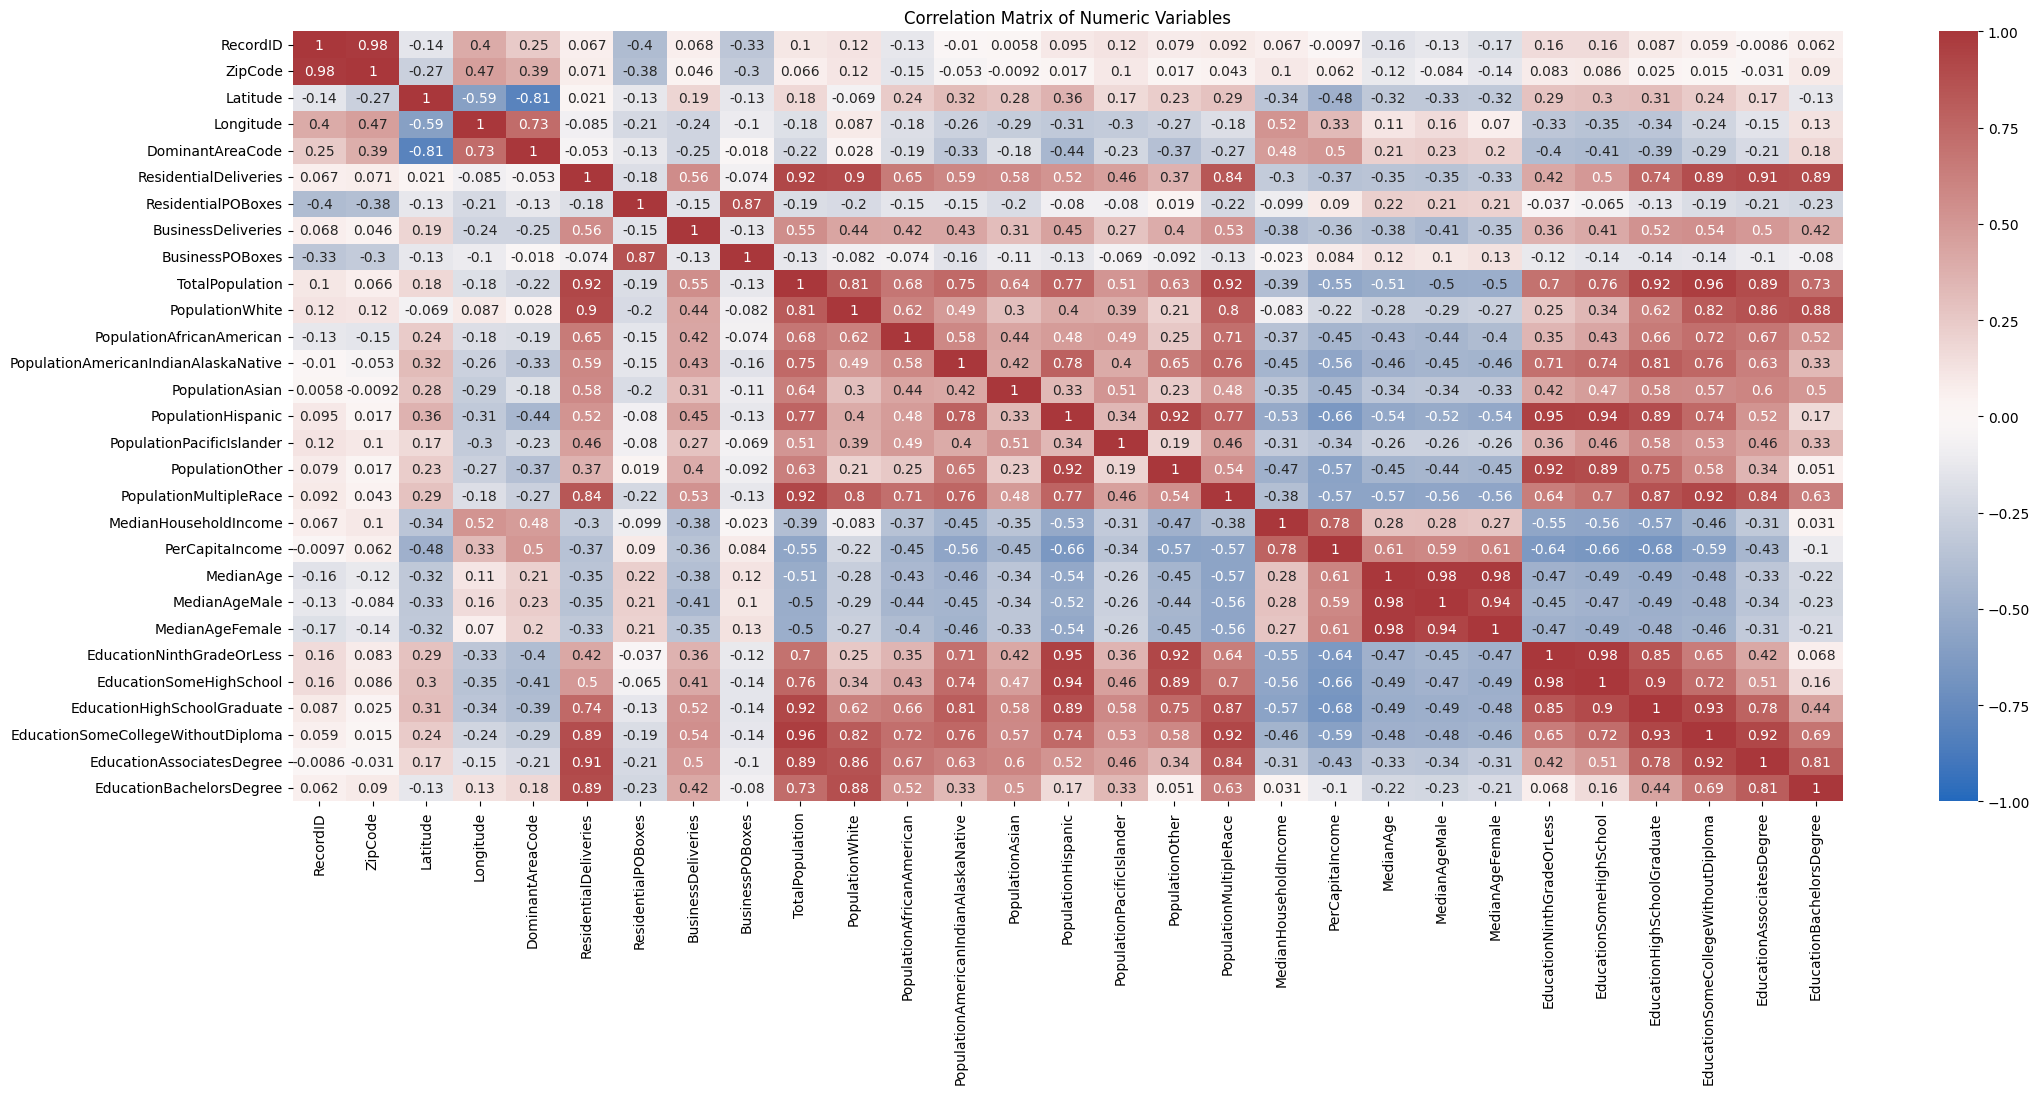

In [11]:
# Correlation matrix heatmap
plt.figure(figsize=(25, 10))
correlation_matrix = oc_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, vmin=-1,vmax=1,cmap="vlag",center=0,annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [12]:
interest_cols = ['ZipCode','Latitude','Longitude','MedianHouseholdIncome']
oc_data[interest_cols].head()

,ZipCode,Latitude,Longitude,MedianHouseholdIncome
235,90620,33.8425,-118.0124,104701.0
236,90621,33.8706,-117.9963,76101.0
237,90623,33.8502,-118.0399,105632.0
238,90623,33.8502,-118.0399,105632.0
239,90630,33.8215,-118.0400,109051.0


In [13]:
oc_data[interest_cols].to_csv('zipcode.csv',index=False)

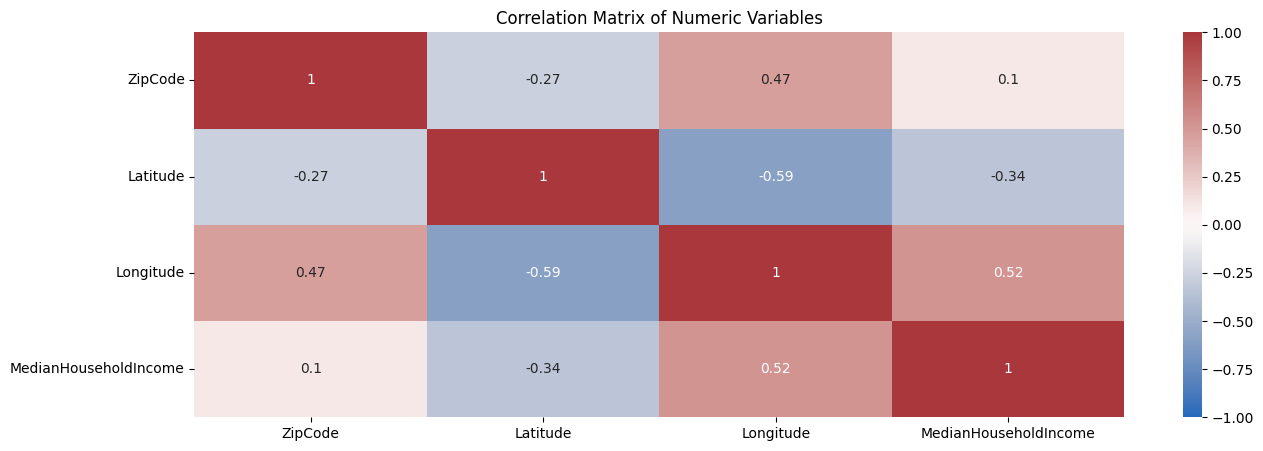

In [14]:
plt.figure(figsize=(15, 5))
correlation_matrix = oc_data[interest_cols].corr()
sns.heatmap(correlation_matrix, vmin=-1,vmax=1,cmap="vlag",center=0,annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [15]:
columns_to_drop = ['DominantAreaCode', 'ResidentialDeliveries','ResidentialPOBoxes', 
                   'BusinessDeliveries', 'BusinessPOBoxes']
oc_data_corr = oc_data[numeric_cols].drop(columns=columns_to_drop)

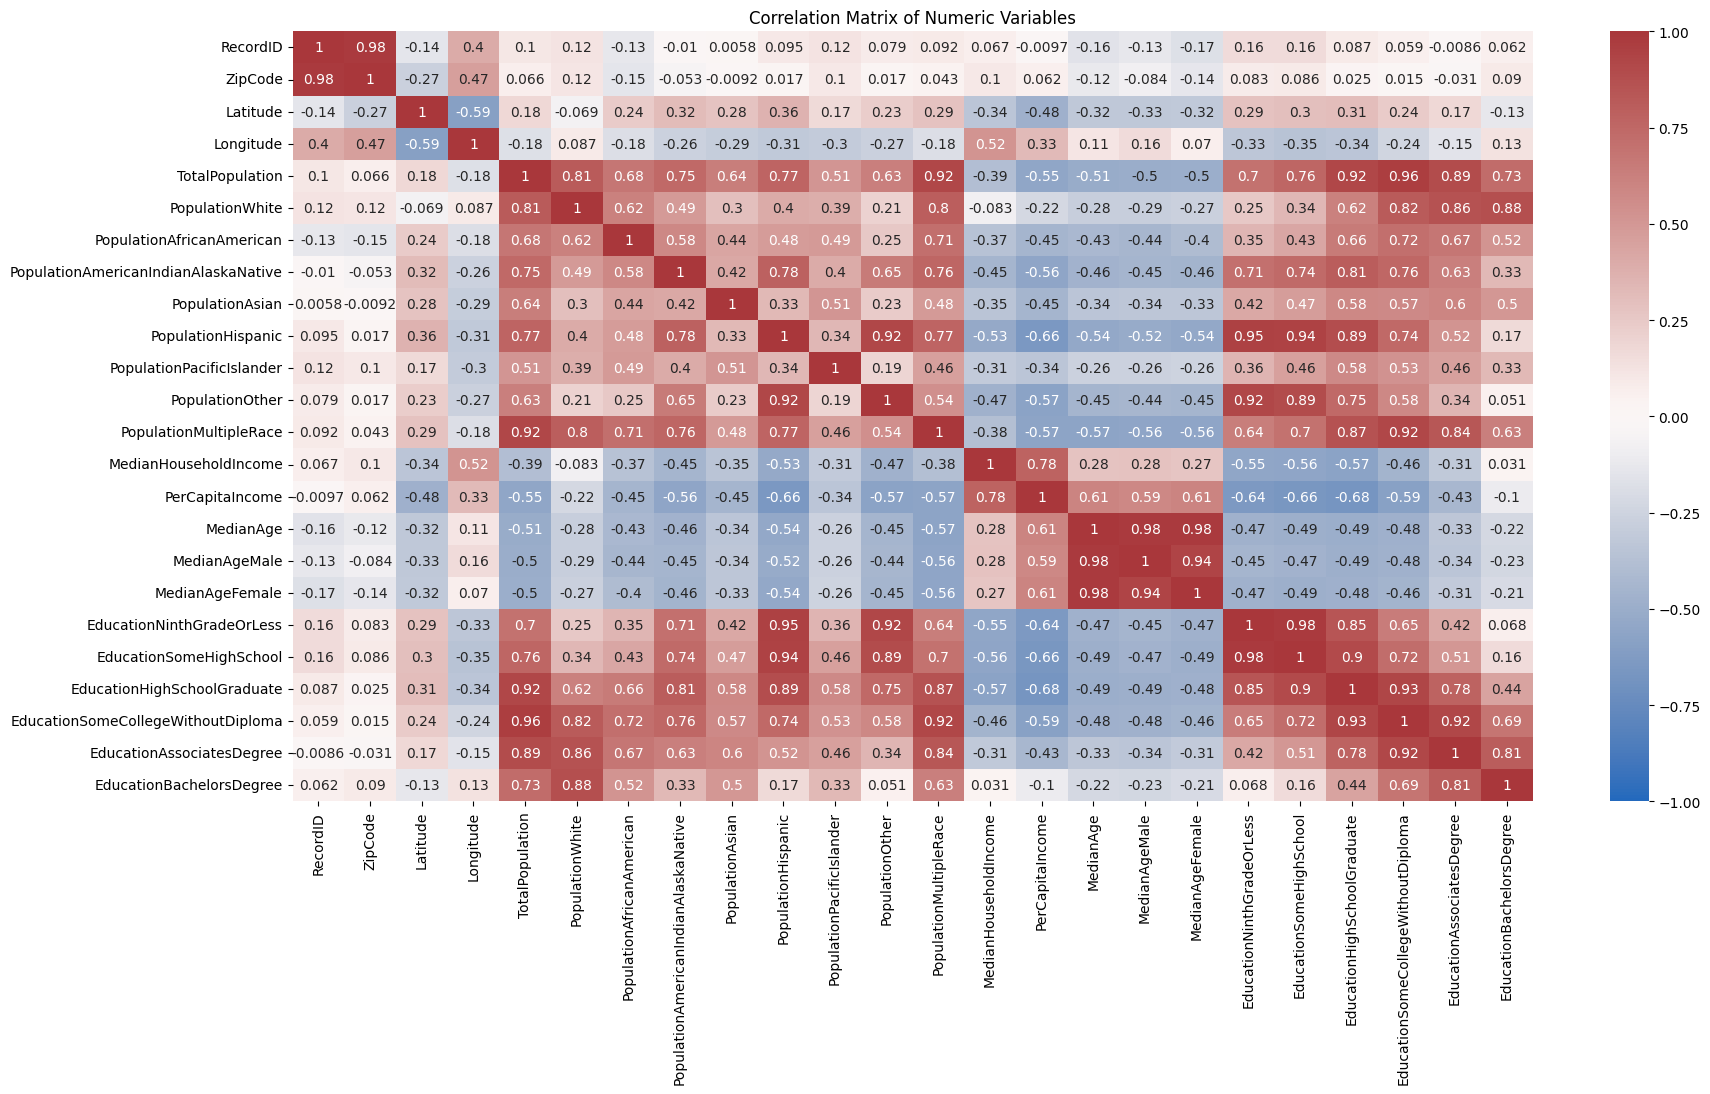

In [16]:
plt.figure(figsize=(20, 10))
correlation_matrix = oc_data_corr.corr()
sns.heatmap(correlation_matrix, vmin=-1,vmax=1,cmap="vlag",center=0,annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [17]:
correlation_matrix

,RecordID,ZipCode,Latitude,Longitude,TotalPopulation,PopulationWhite,PopulationAfricanAmerican,PopulationAmericanIndianAlaskaNative,PopulationAsian,PopulationHispanic,...,PerCapitaIncome,MedianAge,MedianAgeMale,MedianAgeFemale,EducationNinthGradeOrLess,EducationSomeHighSchool,EducationHighSchoolGraduate,EducationSomeCollegeWithoutDiploma,EducationAssociatesDegree,EducationBachelorsDegree
RecordID,1.000000,0.977959,-0.142786,0.400773,0.104127,0.123513,-0.126025,-0.010266,0.005779,0.094674,...,-0.009690,-0.157435,-0.127819,-0.174206,0.156445,0.159957,0.087389,0.059187,-0.008642,0.061556
ZipCode,0.977959,1.000000,-0.272356,0.465737,0.065776,0.115323,-0.145304,-0.053218,-0.009179,0.017094,...,0.062369,-0.117501,-0.084489,-0.135437,0.083456,0.086291,0.024627,0.015254,-0.030537,0.090376
Latitude,-0.142786,-0.272356,1.000000,-0.594306,0.179627,-0.068897,0.239612,0.315047,0.278744,0.359925,...,-0.479522,-0.323563,-0.327825,-0.319007,0.287119,0.304463,0.312484,0.238991,0.174203,-0.131934
Longitude,0.400773,0.465737,-0.594306,1.000000,-0.175506,0.087070,-0.180020,-0.264973,-0.289397,-0.314248,...,0.326611,0.114591,0.161147,0.070252,-0.331556,-0.354196,-0.338602,-0.235023,-0.149522,0.132540
TotalPopulation,0.104127,0.065776,0.179627,-0.175506,1.000000,0.813860,0.677717,0.748792,0.637743,0.767610,...,-0.554658,-0.508572,-0.502751,-0.495558,0.698739,0.764263,0.919524,0.964410,0.894919,0.732139
PopulationWhite,0.123513,0.115323,-0.068897,0.087070,0.813860,1.000000,0.623463,0.491131,0.300079,0.399179,...,-0.220862,-0.283824,-0.285650,-0.272276,0.251702,0.343704,0.622509,0.818144,0.863053,0.875780
PopulationAfricanAmerican,-0.126025,-0.145304,0.239612,-0.180020,0.677717,0.623463,1.000000,0.582394,0.437030,0.478951,...,-0.448720,-0.429505,-0.443537,-0.404878,0.346105,0.425829,0.655462,0.716996,0.674249,0.521356
PopulationAmericanIndianAlaskaNative,-0.010266,-0.053218,0.315047,-0.264973,0.748792,0.491131,0.582394,1.000000,0.418020,0.783631,...,-0.556928,-0.461423,-0.450779,-0.456935,0.706317,0.736713,0.805915,0.756665,0.632255,0.334673
PopulationAsian,0.005779,-0.009179,0.278744,-0.289397,0.637743,0.300079,0.437030,0.418020,1.000000,0.333775,...,-0.447391,-0.343115,-0.335866,-0.333880,0.417388,0.472910,0.584599,0.573782,0.595246,0.503548
PopulationHispanic,0.094674,0.017094,0.359925,-0.314248,0.767610,0.399179,0.478951,0.783631,0.333775,1.000000,...,-0.656086,-0.538655,-0.522364,-0.535540,0.947051,0.942805,0.885770,0.742839,0.519619,0.165856


In [18]:
categorical_cols = [col for col in oc_data.columns if oc_data[col].dtype == 'object']
categorical_cols

['City', 'County', 'State']

In [19]:
# Define the center coordinates for Orange County, California
center_lat = 33.7175  # Latitude of Orange County
center_lon = -117.8311  # Longitude of Orange County


In [20]:
fig = px.density_mapbox(oc_data, lat='Latitude', lon='Longitude', z='MedianHouseholdIncome', radius=10,
                        center=dict(lat=center_lat, lon=center_lon), zoom=8, mapbox_style="open-street-map",title='Median Household Income')

fig.show()

In [21]:
fig = px.density_mapbox(oc_data, lat='Latitude', lon='Longitude', z='TotalPopulation', radius=10,
                        center=dict(lat=center_lat, lon=center_lon), zoom=8, mapbox_style="open-street-map",title='Total Population')
fig.show()


### Combining with Grocery Information

In [22]:
oc_interest = oc_data[interest_cols]

In [23]:
grocery = pd.read_csv('grocery_zip.csv')

In [24]:
grocery.columns

Index(['CensusTract', 'State', 'County', 'LILATracts_1And10',
       'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
       'ZipCode'],
      dtype='object')

In [25]:
grocery.head()

,CensusTract,State,County,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,ZipCode
0,6059001101,California,Orange County,0,0,0,0,90631.0
1,6059001102,California,Orange County,0,0,0,0,90631.0
2,6059001103,California,Orange County,0,0,0,0,90631.0
3,6059001201,California,Orange County,0,1,0,0,90631.0
4,6059001202,California,Orange County,0,1,0,0,90633.0


In [26]:
len(oc_interest)

144

In [27]:
# Merge the two dataframes on the 'ZipCode' column
combined_data = pd.merge(grocery, oc_interest, on='ZipCode')

In [28]:
len(combined_data)

873

In [29]:
# Plot the combined data on a map
fig = px.scatter_mapbox(combined_data, lat='Latitude', lon='Longitude', hover_name='ZipCode',
                        hover_data=['MedianHouseholdIncome', 'LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle'],
                        color='MedianHouseholdIncome',
                        color_continuous_scale=px.colors.sequential.Viridis,
                        size_max=15, zoom=9, mapbox_style="open-street-map")

# Add LILATracts as markers
fig.add_scattermapbox(lat=grocery['Latitude'], lon=grocery['Longitude'], 
                       mode='markers', hoverinfo='skip', marker=dict(size=10, color='red'))

# Show the figure
fig.show()


KeyError: 'Latitude'

In [30]:
# Plot the combined data on a map
fig = px.scatter_mapbox(combined_data, lat='Latitude', lon='Longitude', hover_name='ZipCode',
                        hover_data=['MedianHouseholdIncome', 'LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle'],
                        color='MedianHouseholdIncome',
                        color_continuous_scale=px.colors.sequential.Viridis,
                        size_max=15, zoom=9, mapbox_style="open-street-map")

# Add LILATracts as markers
fig.add_scattermapbox(lat=combined_data['Latitude'], lon=combined_data['Longitude'], 
                       mode='markers', hoverinfo='skip', marker=dict(size=10, color='red'))

# Show the figure
fig.show()


In [31]:
grouped_grocery = grocery.groupby('ZipCode').agg({
    'CensusTract': 'first',
    'State': 'first',
    'County': 'first',
    'LILATracts_1And10': 'sum',
    'LILATracts_halfAnd10': 'sum',
    'LILATracts_1And20': 'sum',
    'LILATracts_Vehicle': 'sum'
}).reset_index()

# Display the first few rows of the grouped data
len(grouped_grocery)


113

In [32]:
fig = px.density_mapbox(combined_data, lat='Latitude', lon='Longitude', z='LILATracts_1And10', radius=10,
                        center=dict(lat=center_lat, lon=center_lon), zoom=8, mapbox_style="open-street-map")
fig.show()


In [33]:
fig = px.density_mapbox(combined_data, lat='Latitude', lon='Longitude', z='LILATracts_halfAnd10', radius=10,
                        center=dict(lat=center_lat, lon=center_lon), zoom=8, mapbox_style="open-street-map")
fig.show()


In [34]:
fig = px.density_mapbox(combined_data, lat='Latitude', lon='Longitude', z='LILATracts_Vehicle', radius=10,
                        center=dict(lat=center_lat, lon=center_lon), zoom=8, mapbox_style="open-street-map",title="How many people don't have a car")
fig.show()


### Death by Heart Attack (obesity)

In [49]:
heart_death = pd.read_csv('heartdeath.csv')

In [50]:
heart_death.head()

,Unnamed: 0,year,ZipCode,geography_type,strata,strata_name,cause,cause_desc,icd_revision,count,annotation_code,annotation_desc,data_revision_date
0,20,2019,90001,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,57.0,NaN,NaN,12/06/2023
1,48,2019,90002,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,62.0,NaN,NaN,12/06/2023
2,76,2019,90003,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,91.0,NaN,NaN,12/06/2023
3,104,2019,90004,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,63.0,NaN,NaN,12/06/2023
4,132,2019,90005,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,40.0,NaN,NaN,12/06/2023


In [53]:
len(heart_death)

2242

In [54]:
heart_death = heart_death.dropna(axis=1)

In [55]:
heart_death.head()

,Unnamed: 0,year,ZipCode,geography_type,strata,strata_name,cause,cause_desc,icd_revision,count,annotation_code,annotation_desc,data_revision_date
9,272,2019,90010,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,5.0,1.0,Cell suppressed for small numbers,12/06/2023
20,580,2019,90021,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,5.0,1.0,Cell suppressed for small numbers,12/06/2023
54,1532,2019,90055,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,5.0,1.0,Cell suppressed for small numbers,12/06/2023
57,1616,2019,90058,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,5.0,1.0,Cell suppressed for small numbers,12/06/2023
72,2036,2019,90073,Residence,Total Population,Total Population,HTD,Diseases of heart,ICD-10,5.0,1.0,Cell suppressed for small numbers,12/06/2023


In [37]:
heart_zip = pd.merge(heart_death, oc_interest, on='ZipCode')

In [38]:
heart_death['year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10651    2022
10652    2022
10653    2022
10654    2022
10655    2022
Name: year, Length: 10656, dtype: int64

In [39]:
fig = px.density_mapbox(heart_zip, lat='Latitude', lon='Longitude', z='count', radius=10,
                        center=dict(lat=center_lat, lon=center_lon), zoom=8, mapbox_style="open-street-map",title='Heart Disease')
fig.show()


### Correlation between heart death, income, and groceries

In [68]:
numeric_cols = [col for col in grocery.columns if grocery[col].dtype != 'object']
grocery_nums = grocery[numeric_cols]

In [69]:
numeric_cols = [col for col in heart_death.columns if heart_death[col].dtype != 'object']
heart_nums = heart_death[numeric_cols]

In [70]:
# Merge the datasets on the 'ZipCode' column
merged_data = pd.merge(heart_nums, oc_interest, on='ZipCode')
merged_data = pd.merge(merged_data, grocery_nums, on='ZipCode')

In [71]:
merged_data.head()

,Unnamed: 0,year,ZipCode,count,annotation_code,Latitude,Longitude,MedianHouseholdIncome,CensusTract,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle
0,26900,2019,92610,5.0,1.0,33.6827,-117.6633,155101.0,6059052427,0,0,0,0
1,177045,2021,92610,5.0,1.0,33.6827,-117.6633,155101.0,6059052427,0,0,0,0
2,177045,2021,92610,5.0,1.0,33.6827,-117.6633,155101.0,6059052427,0,0,0,0
3,177045,2021,92610,5.0,1.0,33.6827,-117.6633,155101.0,6059052427,0,0,0,0
4,254301,2022,92610,5.0,1.0,33.6827,-117.6633,155101.0,6059052427,0,0,0,0


In [75]:
len(merged_data)

48

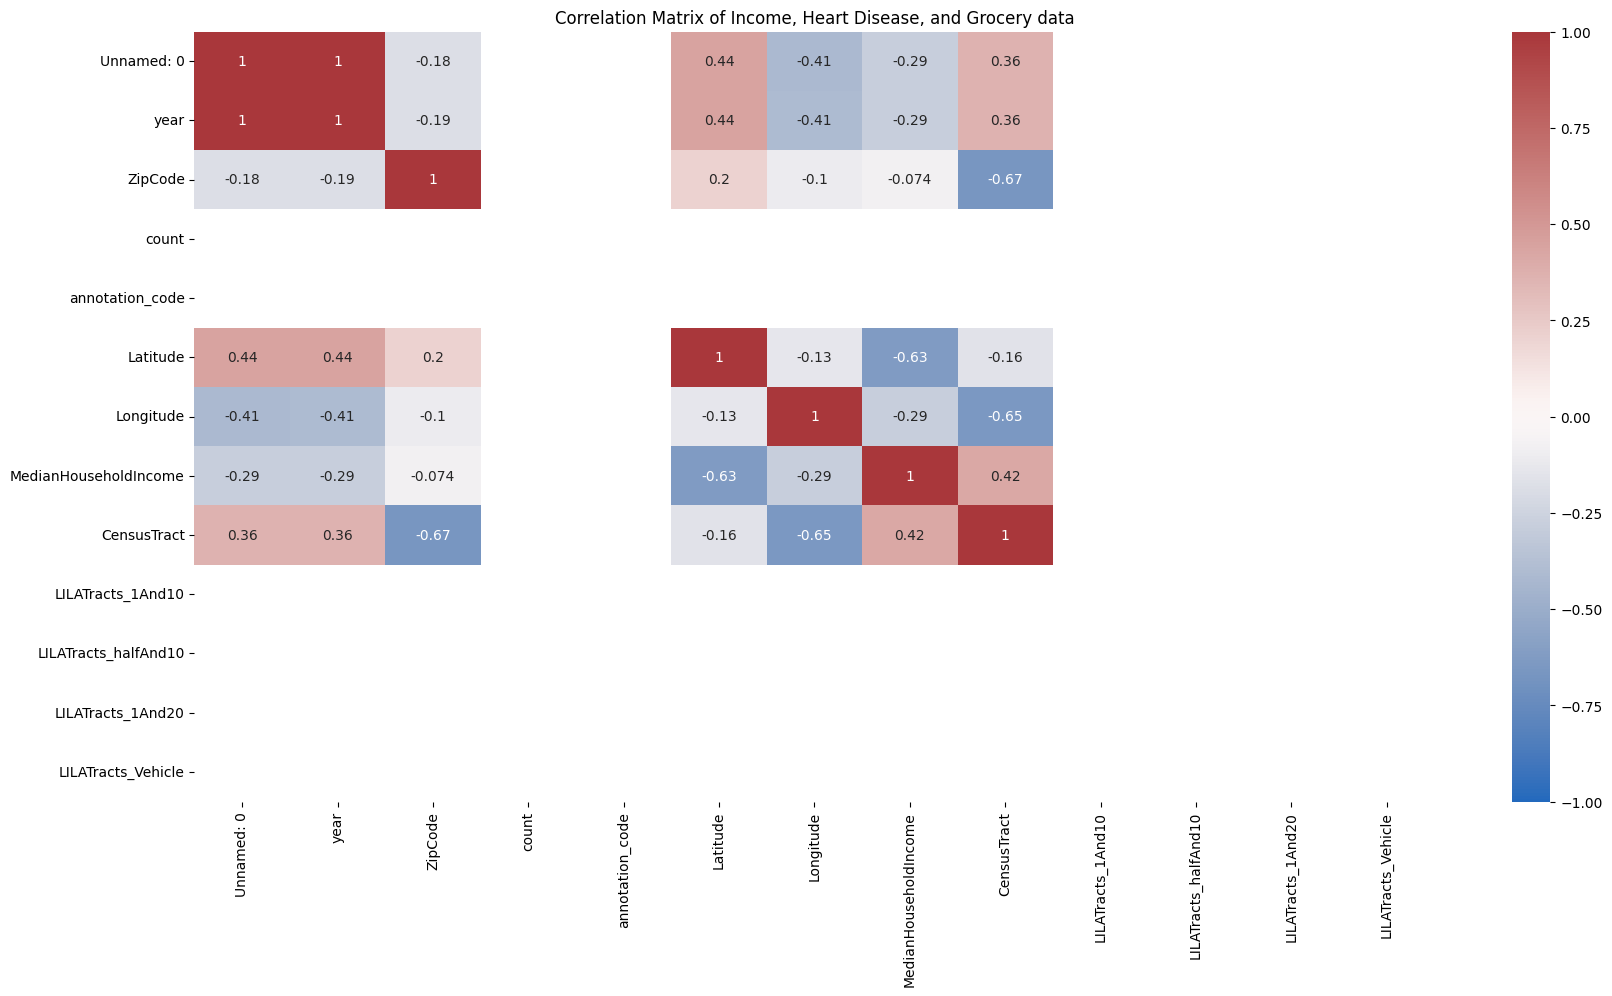

In [72]:
plt.figure(figsize=(20, 10))
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, vmin=-1,vmax=1,cmap="vlag",center=0,annot=True)
plt.title('Correlation Matrix of Income, Heart Disease, and Grocery data')
plt.show()